In [64]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 8))

In [42]:
# Load the data
data = pd.read_csv('crimecoef.csv')

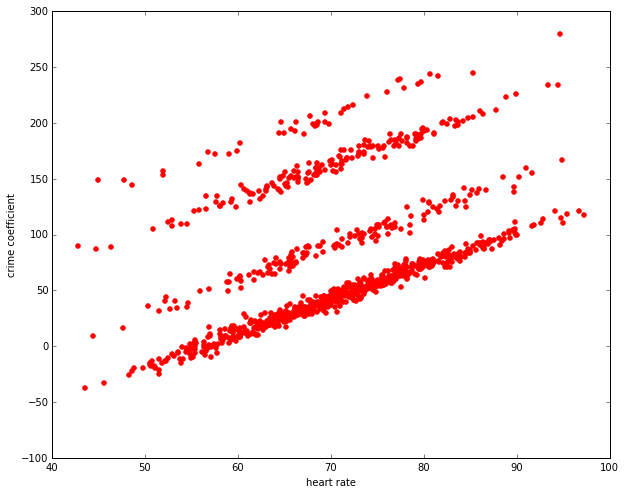

In [43]:
# Explore the data
plt.scatter(x=data.heart_rate,
            y=data.crime_coef,
            color='red')
plt.xlabel('heart rate')
plt.ylabel('crime coefficient')

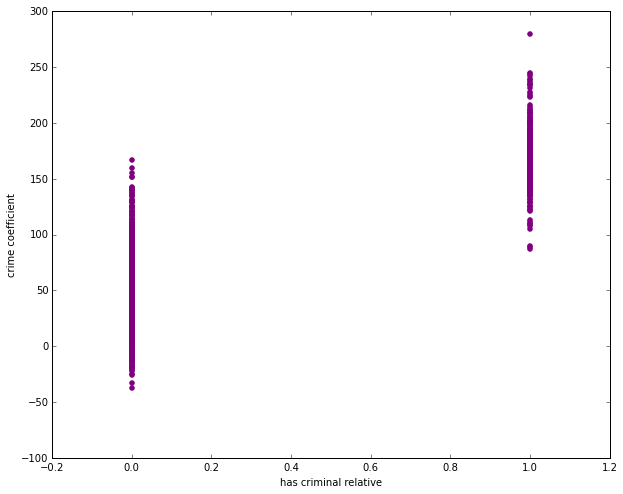

In [44]:
plt.scatter(x=data.has_criminal_relative,
            y=data.crime_coef,
            color='purple')
plt.xlabel('has criminal relative')
plt.ylabel('crime coefficient')

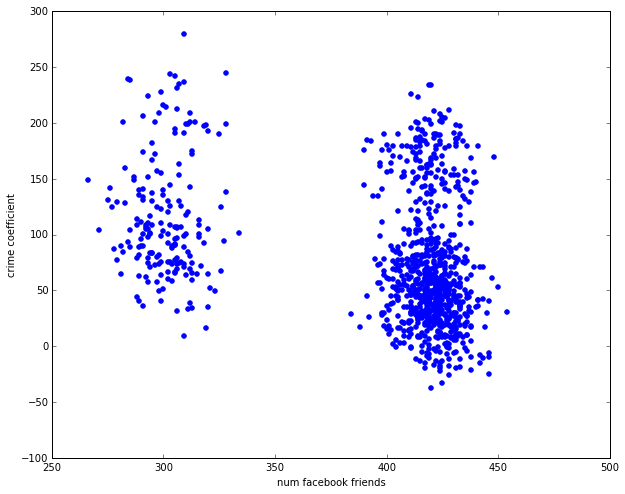

In [45]:
plt.scatter(x=data.num_facebook_friends,
            y=data.crime_coef,
            color='blue')
plt.xlabel('num facebook friends')
plt.ylabel('crime coefficient')

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
n_samples = len(data)
y = data['crime_coef'].values.reshape(n_samples, 1)

# Heart Rates

It looks like heart rates are pretty informative about criminality. Let's see if we can predict the coefficients with just that.


In [96]:
X = data['heart_rate'].values.reshape(n_samples, 1)
m = LinearRegression()
m.fit(X, y)
y_pred = m.predict(X)
mean_squared_error(y_pred, y)

2777.103741069358

In [97]:
params = m.coef_
print(params)

[[ 2.73367107]]


$$y=2.73x$$
$$x = \text{heart rate}$$

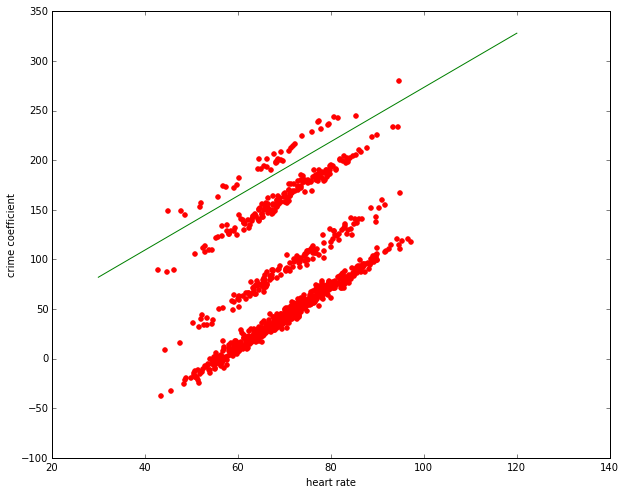

In [70]:
def make_line(params, frm, to):
    xs = np.linspace(frm, to, 500)
    ys = np.dot(xs[:,np.newaxis], params)
    return xs, ys

xs, ys = make_line(m.coef_, 30, 120)
plt.scatter(x=data.heart_rate,
            y=data.crime_coef,
            color='red')
plt.xlabel('heart rate')
plt.ylabel('crime coefficient')
plt.plot(xs, ys, color='green')

# Num. Facebook Friends

Heart rates don't work so great, how about Facebook friends?


In [99]:
X = data['num_facebook_friends'].values.reshape(n_samples, 1)
m = LinearRegression()
m.fit(X, y)
y_pred = m.predict(X)
mean_squared_error(y_pred, y)

3111.5958428330432

In [100]:
params = m.coef_
print(params)

[[-0.40231685]]


$$y=-0.40x$$
$$x = \text{number of facebook friends}$$

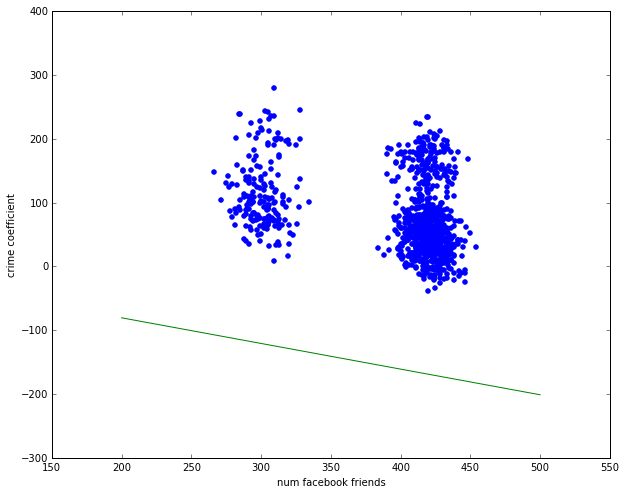

In [75]:
xs, ys = make_line(m.coef_, 200, 500)
plt.scatter(x=data.num_facebook_friends,
            y=data.crime_coef,
            color='blue')
plt.xlabel('num facebook friends')
plt.ylabel('crime coefficient')
plt.plot(xs, ys, color='green')

# Criminal relative

Facebook friends are not very good either - how about the criminal relative variable?


In [102]:
X = data['has_criminal_relative'].values.reshape(n_samples, 1)
m = LinearRegression()
m.fit(X, y)
y_pred = m.predict(X)
mean_squared_error(y_pred, y)

1177.6363286151864

In [103]:
params = m.coef_
print(params)

[[ 118.01388652]]


$$y=118x$$
$$x = \text{has criminal relative}$$

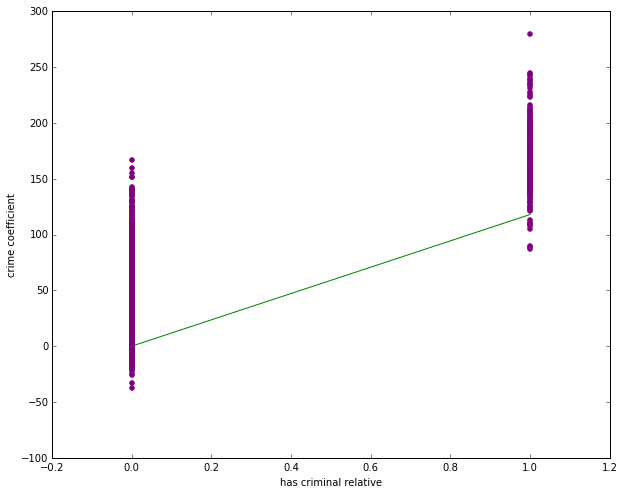

In [78]:
xs, ys = make_line(m.coef_, 0, 1)
plt.scatter(x=data.has_criminal_relative,
            y=data.crime_coef,
            color='purple')
plt.xlabel('has criminal relative')
plt.ylabel('crime coefficient')
plt.plot(xs, ys, color='green')

# Multiple variables at once

None of those features worked well on their own. Maybe if we combine them?

In [104]:
X = data[['heart_rate', 'num_facebook_friends']].values
m = LinearRegression()
m.fit(X, y)
y_pred = m.predict(X)
mean_squared_error(y_pred, y)

2377.6119650536039

In [105]:
params = m.coef_
print(params)

[[ 2.79452828 -0.41908497]]


$$y=2.79x_1 -0.42x_2$$
$$x_1 = \text{heart rate}, x_2 = \text{number of facebook friends}$$

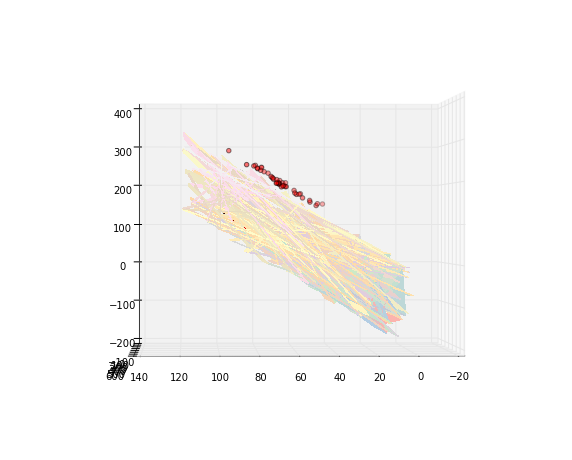

In [92]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from artsec import make_plane
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def make_plane(params):
    xs = np.random.rand(200,2)
    xs[:,0] *= 120
    xs[:,1] *= 500
    ys = np.dot(params, xs.T)
    return xs.T, ys

fig = plt.figure()
xs, ys = make_plane(m.coef_)
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(xs[0], xs[1])
ax.scatter(data.heart_rate, data.num_facebook_friends, data.crime_coef, c='r', marker='o')
ax.plot_surface(X, Y, ys, rstride=1, cstride=1, linewidth=0, antialiased=False, cmap=cm.Pastel1)
ax.view_init(elev=0, azim=88) # manipulate "camera"
plt.show()



In [109]:
X = data[['heart_rate', 'has_criminal_relative', 'num_facebook_friends']].values
m = LinearRegression()
m.fit(X, y)
y_pred = m.predict(X)
mean_squared_error(y_pred, y)

0.93288416245911499

In [110]:
params = m.coef_
print(params)

[[   3.00047526  120.0268371    -0.39943528]]


$$y=3x_1 +120x_2 -0.4x_3$$
$$x_1 = \text{heart rate}, x_2 = \text{has criminal relative}, x_3 = \text{number of facebook friends}$$

In [19]:
from ml101 import true_params
true_params

array([   3. ,  120. ,   -0.4])